# **Ismail Olumegbon**

# Homework \#8 Interplation and Regression


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy import optimize
import math
from scipy.stats import linregress
from IPython.display import Math
import netCDF4
import datetime
import cartopy.crs as ccrs

In [5]:
ls /content/drive/Shareddrives/ZZhang_Teaching/Data/Cloud_Fraction.npy

/content/drive/Shareddrives/ZZhang_Teaching/Data/Cloud_Fraction.npy


## Problem \#1
In the Monte-Carlo radiative transfer code, we have been using the **isotropic** scattering phase function. The figure below shows the scattering phase function of water droplet for the scattering angle between 90~160 degree.


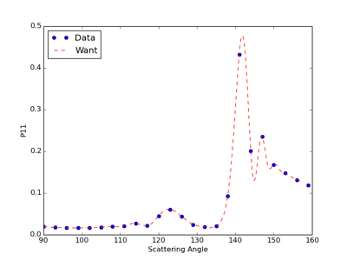

Now, suppose that you have obtained the scattering phase function at some coarse resolution (i.e., the blue dots in the figure).  Use the 1) linear, 2) Lagrange and 3) cubic spline methods to interpolate and get high-angular resolution data at every 0.5 degree. 


In [6]:
phase_function_low = np.load('/content/drive/Shareddrives/ZZhang_Teaching/Data/Phase_function_low.npy')
scattering_angle_low = np.load('/content/drive/Shareddrives/ZZhang_Teaching/Data/scattering_angle_low.npy')
scattering_angle_high = np.load('/content/drive/Shareddrives/ZZhang_Teaching/Data/scattering_angle_high.npy')
# use scattering_angle_low (x) and phase_function_low (y) to interpolate the 
# phase_function_high corresponding to scattering_angle_high
# phase_function_high = interpolation

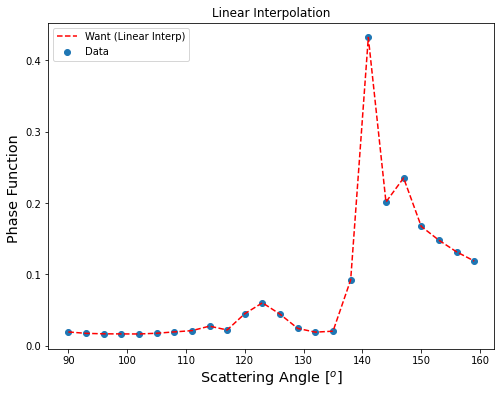

In [7]:
# plot the interpolation results 
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(scattering_angle_low,phase_function_low,label='Data')
ax.plot(scattering_angle_low,phase_function_low,'r--', label='Want (Linear Interp)')
ax.set_xlabel(r'Scattering Angle [$^o$]', fontsize='x-large')
ax.set_ylabel(r'Phase Function ', fontsize='x-large')
ax.legend(loc='best')
ax.set_title('Linear Interpolation',fontsize='large')
ax.legend()
plt.show()

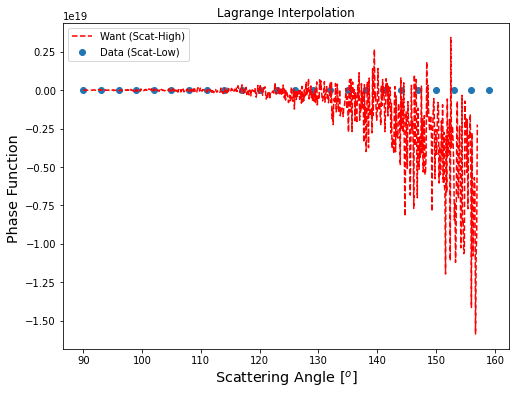

In [8]:
#scattering_angle_low,phase_function_low
f = lagrange(scattering_angle_low,phase_function_low)
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(scattering_angle_low,phase_function_low,label='Data (Scat-Low)')
ax.plot(scattering_angle_high, f(scattering_angle_high),'r--', label='Want (Scat-High)')
ax.set_xlabel(r'Scattering Angle [$^o$]', fontsize='x-large')
ax.set_ylabel(r'Phase Function ', fontsize='x-large')
ax.legend(loc='best')
ax.set_title('Lagrange Interpolation',fontsize='large')
plt.show()

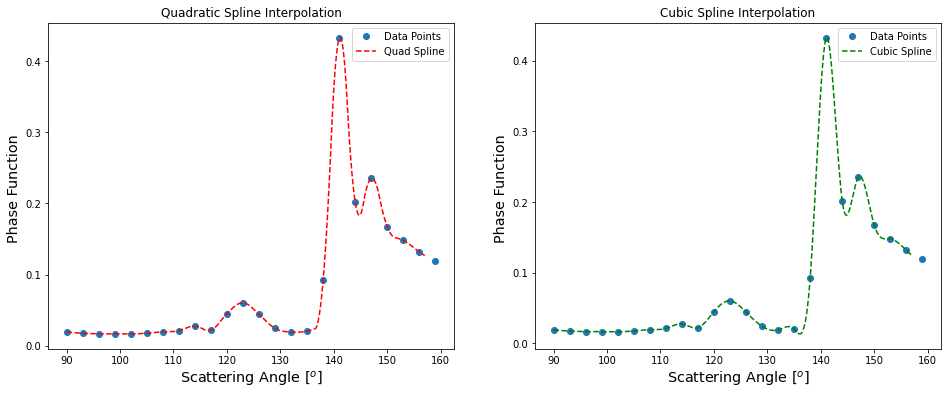

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
f_quad = interp1d(scattering_angle_low,phase_function_low,kind='quadratic')
P_quad = f_quad(scattering_angle_high)
f_cubic = interp1d(scattering_angle_low,phase_function_low,kind='cubic')
P_cubic = f_cubic(scattering_angle_high)
ax1.plot(scattering_angle_low, phase_function_low, 'o', label='Data Points')
ax2.plot(scattering_angle_low, phase_function_low, 'o', label='Data Points')
ax1.plot(scattering_angle_high, P_quad, 'r--', label='Quad Spline')
ax2.plot(scattering_angle_high, P_cubic, 'g--', label='Cubic Spline')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel(r'Scattering Angle [$^o$]', fontsize='x-large')
ax1.set_ylabel(r'Phase Function ', fontsize='x-large')
ax2.set_xlabel(r'Scattering Angle [$^o$]', fontsize='x-large')
ax2.set_ylabel(r'Phase Function ', fontsize='x-large')
ax1.set_title('Quadratic Spline Interpolation',fontsize='large')
ax2.set_title('Cubic Spline Interpolation',fontsize='large')
plt.show()

# Problem \#2 

Assume your Monte-Carlo radiative transfer code computes the cloud reflectances (“Ref”) for several values of cloud optical thickness (“Tau”). See data below.
	

1.   Use cubic spline method the interpolate the data
2.   Use the model Ref=Tau/(a+bTau) to fit the data, where a and b are two adjustable parameters. Find the optimal values for a and b
3. Convert the second problem to a linear fitting problem. 







In [10]:
Tau = np.array([  0.299,        1.29400003 ,  2.28900003  ,  3.28399992,   4.27899981,
   5.27399969 ,  6.26900005 ,  7.26399994,   8.25900078 ,  9.25400066,
  10.2490005,   11.2440004 ,  12.2390003,   13.2340002 ,  14.2290001,
  15.2240009 ,  16.2189999 ,  17.2140007   ,18.2089996 ,  19.2040005 ])

Ref = np.array([ 0.17678887,  0.48721159 , 0.62823123 , 0.70785129,  0.75912076, 
                0.79498094, 0.82153791,  0.84198004,  0.85822612, 0.87143803,  0.8823905,   
                0.89163792, 0.89952338,  0.90634716,  0.91229314 , 0.91752762,  0.92218465, 
                0.92633438, 0.93006754,  0.93343675])
Tau_high = np.linspace(0.3,19,100)

Text(0, 0.5, 'Cloud Reflectance $R$')

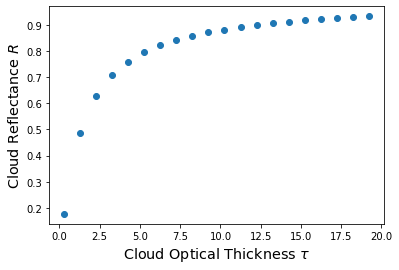

In [11]:
fig, ax=plt.subplots()
ax.scatter(Tau,Ref,label='low resolution')
ax.set_xlabel(r'Cloud Optical Thickness $\tau$', fontsize='x-large')
ax.set_ylabel(r'Cloud Reflectance $R$', fontsize='x-large')

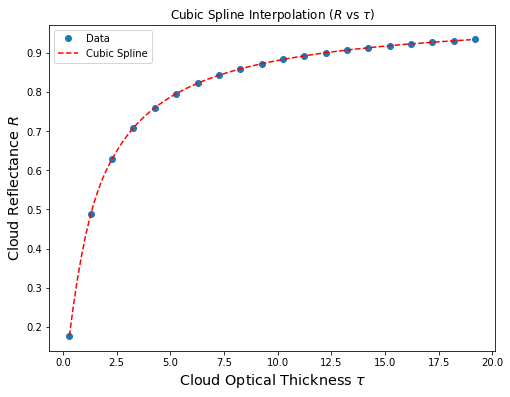

In [12]:
fig,ax = plt.subplots(figsize=(8,6))
f_cubic = interp1d(Tau,Ref,kind='cubic')
R_cubic = f_cubic(Tau_high)
ax.plot(Tau, Ref, 'o', label='Data')
ax.plot(Tau_high, R_cubic, 'r--', label='Cubic Spline')
plt.legend(loc='best')
ax.set_xlabel(r'Cloud Optical Thickness $\tau$', fontsize='x-large')
ax.set_ylabel(r'Cloud Reflectance $R$', fontsize='x-large')
ax.set_title(r'Cubic Spline Interpolation ($R$ vs $\tau$)',fontsize='large')
plt.show()

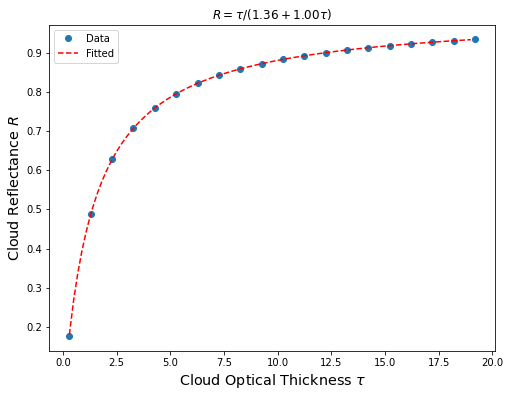

a = 1.361004585711763
b = 1.0002898950459747


In [37]:
def Ref_Tau(Tau,a,b):
    return Tau/(a+b*Tau)
p,pcov = curve_fit(Ref_Tau,Tau,Ref)
#Tau_fit = np.linspace(0.2,20,1000)
Ref_fit = Ref_Tau(Tau_high,p[0],p[1])
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(Tau,Ref,'o', label='Data')
ax.plot(Tau_high,Ref_fit,'r--', label='Fitted')
ax.set_xlabel(r'Cloud Optical Thickness $\tau$', fontsize='x-large')
ax.set_ylabel(r'Cloud Reflectance $R$', fontsize='x-large')
ax.set_title(r'$R = \tau / (%.2f + %.2f \tau) $' %(p[0], p[1]))
ax.legend(loc='best')
plt.show()
print(f'a = {p[0]}')
print(f'b = {p[1]}')

In [14]:
def linearfit(x, y, yerr=None):
    w = None if (yerr is None or np.sum(yerr)==0) else 1/yerr
    p = np.polyfit(x, y, 1, w=w)  # coefficients and covariance matrix
    yfit = np.polyval(p, x)          # evaluate the polynomial at x
    
    SS_total = np.var(y)*y.size
    resid = y - yfit                                        # residual 
    SS_res =  np.sum(resid**2) 
    
    chi2red = None if  (yerr is None or np.sum(yerr)==0) else   np.sum((resid/yerr)**2) /(y.size - 2)        # chi_square
    R2 = 1.0 - SS_res/SS_total                   # coefficient of determination between x and y

    return yfit, p, R2, chi2red, resid

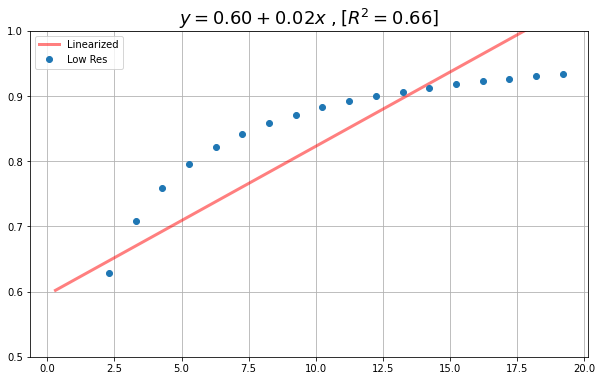

In [15]:
#linearize problem 2
# Ref=Tau/(a+bTau) => f = Tau/Ref = a + bTau
#f = Tau_high/Ref_fit
#f = Tau/Ref
# plot
x = Tau_high
y = Ref_fit
fig, ax = plt.subplots(figsize=(10, 6))
yf, p, R2, chi2red, resid = linearfit(x, y)
ax.plot(x, yf, 'r', linewidth=3, color=[1, 0, 0, .5], label='Linearized')
ax.plot(Tau,Ref,'o', label='Low Res')
ax.set_title('$y = %.2f + %.2f x \ ,  [R^2=%.2f]$'%(p[1], p[0], R2), fontsize=18) 
ax.legend(loc='best') 
ax.set_ylim(0.5, 1.0)
ax.grid()

## Problem \#3 
The file “Cloud_Fraction.npy” contains 4 years satellite observations of the diurnal variation of cloud fraction in the Southeast Atlantic region. As you can see, the cloud fraction has a strong diurnal cycle. This is primarily because increasing solar radiation leads to stronger cloud absorption that “burns” off cloud fraction. 

Based on the cloud fraction data, develop a non-linear model to describe the diurnal variation of cloud in the Southeast Atlantic region. Print out the formula of your model and list all adjustable parameters. Plot the fitting result in the same figure with the original data.


In [16]:
CF =  np.load('/content/drive/Shareddrives/ZZhang_Teaching/Data/Cloud_Fraction.npy')

In [17]:
nhour,nyear=CF.shape
print('number of local hours',nhour)
print('number of years',nyear)
print('shape of cloud fraction',CF.shape)

number of local hours 24
number of years 5
shape of cloud fraction (24, 5)


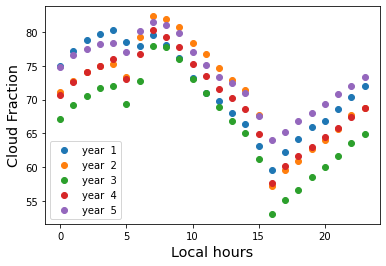

In [18]:
fig,ax=plt.subplots()
hours = np.arange(nhour)
for y in range(nyear):
  ax.scatter(hours,CF[:,y], label='year {0:2d}'.format(y+1))
ax.set_xlabel(r'Local hours', fontsize='x-large')
ax.set_ylabel(r'Cloud Fraction', fontsize='x-large')
ax.legend()

Fitted parameters for year 1 :


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Fitted parameters for year 2 :


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Fitted parameters for year 3 :


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Fitted parameters for year 4 :


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Fitted parameters for year 5 :


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

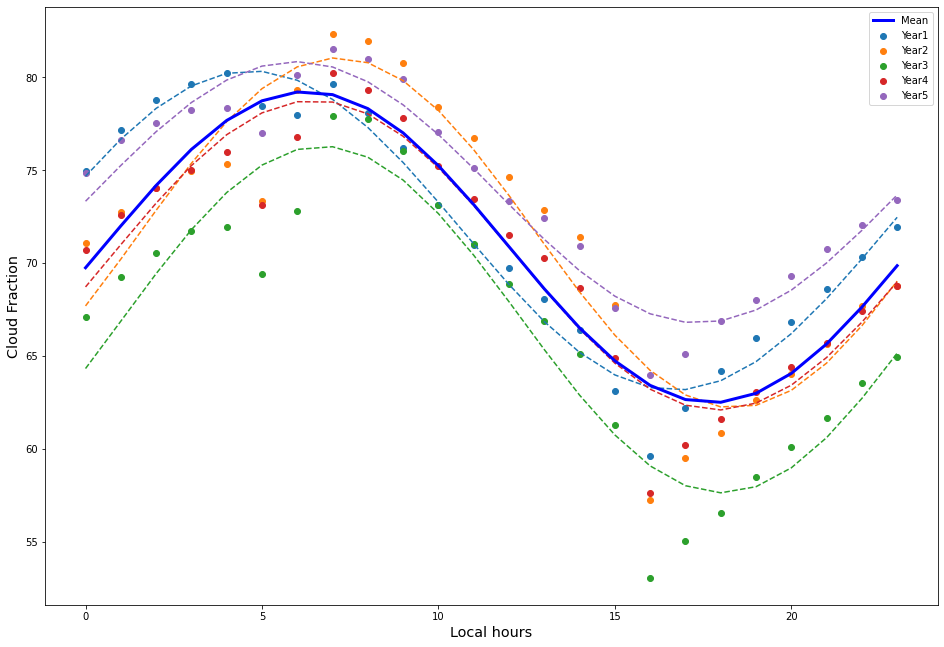

In [19]:
def func(x, y0, A0, omega, phi0):
    return y0 + A0 * np.sin(omega * x + phi0)
local_hour = np.arange(24)
nh,nyear=CF.shape
fig,ax=plt.subplots(figsize=(16,11))
yfits = []
for i in range(nyear):
  ax.scatter(local_hour,CF[:,i],label='Year{0:1d}'.format(i+1))
  params, params_covariance = optimize.curve_fit(func, local_hour,CF[:,i],p0=[1,1,1/4,1])
  yfit = func(local_hour, params[0], params[1], params[2], params[3])
  yfits.append(yfit)
  perr = np.sqrt(np.diag(params_covariance))
  print('Fitted parameters for year',i+1,':')
  display(Math( r'y0=%.2f \pm %.2f' %(params[0], perr[0]) ))
  display(Math( r'A0=%.2f \pm %.2f' %(params[1], perr[1]) ))
  display(Math( r'omega=%.2f \pm %.2f' %(params[2], perr[2]) ))
  display(Math( r'phi0=%.2f \pm %.2f' %(params[3], perr[3]) ))
  plt.plot(local_hour, yfit, '--')
yfits = np.array(yfits)
YFit_Final= yfits.mean(axis=0)
plt.plot(local_hour, YFit_Final, 'b', linewidth=3,label='Mean')
ax.legend(loc='best')
ax.set_xlabel(r'Local hours', fontsize='x-large')
ax.set_ylabel(r'Cloud Fraction', fontsize='x-large')
plt.show()

## Problem \#4 Analysis the cloud droplet number concentration (This is a challenging one)

The file /content/drive/Shareddrives/PHYS640-440/Data/cdnc_climatology.nc
contains the cloud droplet number concentration (CDNC) drived from satellite observations based on the study 

*Bennartz, R. and Rausch, J., 2017: Global and regional estimates of warm cloud droplet number concentration based on 13 years of AQUA-MODIS observations, Atmos. Chem. Phys., 17, 9815-9836, https://doi.org/10.5194/acp-17-9815-2017, 2017.*

Our objective here is to derive the climatology of CDNC over the East Coastal region of the U.S., including the:


*   Regional mean Seasonal Cycle of CDNC
*   The trend of regional mean CDNC over the last 15 years



In [20]:
class Bennartz_CDNC():
    def __init__(self,filename):
        from netCDF4 import Dataset 
        import datetime
        nc_fid = Dataset(filename, 'r')
        nc_fid.set_auto_mask(False)
        self.t0   = datetime.datetime(1951,1,1)
        self.time = nc_fid.variables['time'][:] 
        days = []
        for t in self.time:
            days.append(self.t0 +  datetime.timedelta(t))
        self.days = days
        self.lon  = nc_fid.variables['lon'][:] #* units('degree_E')
        self.lat  = nc_fid.variables['lat'][:] #* units('degree_N')
        self.cdnc = nc_fid.variables['CDNC'][:] #* units('cm^-3')
        self.cdnc[self.cdnc<0.0] = np.NAN
Bennartz_CDNC_file='/content/drive/Shareddrives/ZZhang_Teaching/Data/cdnc_climatology.nc'
CDNC = Bennartz_CDNC(Bennartz_CDNC_file)

In [21]:
print('number of months',len(CDNC.days))
print('number of longtitude',len(CDNC.lon))
print('number of latitude',len(CDNC.lat))
print('dimension of CDNC', CDNC.cdnc.shape)
print('normal operation would not work, e.g.,',CDNC.cdnc.min())
print('use nan operators', np.nanmin(CDNC.cdnc))

number of months 156
number of longtitude 360
number of latitude 180
dimension of CDNC (156, 180, 360)
normal operation would not work, e.g., nan
use nan operators 13.252174


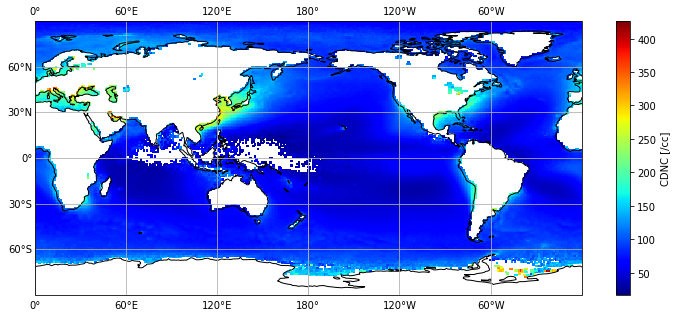

In [39]:
proj = ccrs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(1, 1, figsize=(12,8),
                       subplot_kw={'projection': proj})
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
cf=ax.pcolormesh(CDNC.lon,CDNC.lat,np.nanmean(CDNC.cdnc,axis=0),
              transform=ccrs.PlateCarree(),
              cmap='jet')
fig.subplots_adjust(hspace=0, wspace=0, top=0.6, left=0.1)

plt.colorbar(cf,ax=ax,label='CDNC [/cc]')
def resize_colobar(event):
    plt.draw()
    posn = ax.get_position()
    cbar_ax.set_position([posn.x0 + posn.width + 0.01, posn.y0,
                          0.04, posn.height])
fig.canvas.mpl_connect('resize_event', resize_colobar)
plt.show()


### analysis the trend of CDNC over east coast of U.S.
25 degreeN < EUS latitute < 45 degreeN
80 degreeW < EUS longitude < 50 degreeW


In [23]:
EUS_lat = (CDNC.lat >25) & (CDNC.lat<45)
EUS_lon = (CDNC.lon >360-80) & (CDNC.lon<360-50)

Text(0, 0.5, 'CDNC in the EUS [$cm^{-3}$]')

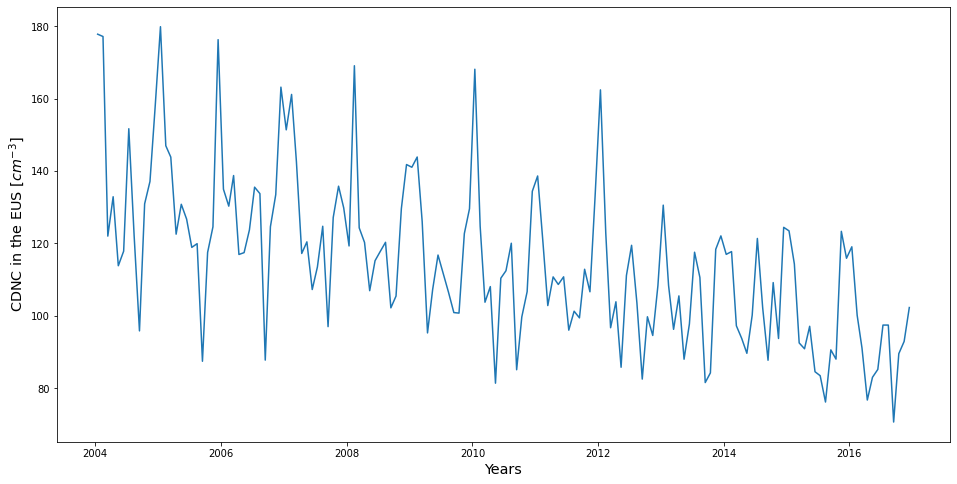

In [24]:
fig,ax=plt.subplots(figsize=(16,8))
cdnc_EUS = CDNC.cdnc[:,EUS_lat,:][:,:,EUS_lon]
ax.plot(CDNC.days,np.nanmean(cdnc_EUS,axis=(1,2)))
ax.set_xlabel('Years',fontsize='x-large')
ax.set_ylabel(r'CDNC in the EUS [$cm^{-3}$]',fontsize='x-large')

### derive the annual cycle of the CDNC in the East US


In [25]:
cdnc_EUS.shape

(156, 20, 30)

In [26]:
cdnc_lat_lon_mean = np.nanmean(cdnc_EUS,axis=(1,2)) # taking mean over lats and lons
yearly_cdnc = cdnc_lat_lon_mean.reshape(13,12).T
yearly_cdnc.shape

(12, 13)

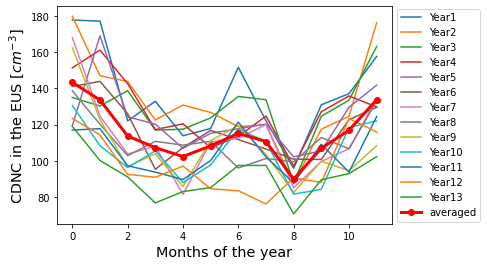

In [27]:
fig,ax=plt.subplots()
for i in range(0,13):
  ax.plot(yearly_cdnc[:,i], label="Year"+str(i+1))
ax.plot(np.mean(yearly_cdnc, axis=(1)), 'ro-', lw = 3, label = 'averaged')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel(r'Months of the year', fontsize='x-large')
ax.set_ylabel(r'CDNC in the EUS [$cm^{-3}$]', fontsize='x-large')
plt.show()

### derive the linear regression trend of 



*   the annual mean CDNC in the East US
*   the summer (June-July-Aug.) mean CDNC in the East US
*   the winter (Dec.-Jan.-Feb.) mean CDNC in the East US

Use the linear regression (linregress from scipy) to derive the trend of the above time series, print the R-value and P-value of each



In [28]:
yearly = cdnc_lat_lon_mean.reshape(13,12)
summer = yearly[:,[5,6,7]]
winter = yearly[:,[-1,0,1]]

r-value= -0.9936470234455629
p-value= 8.672961503393991e-12


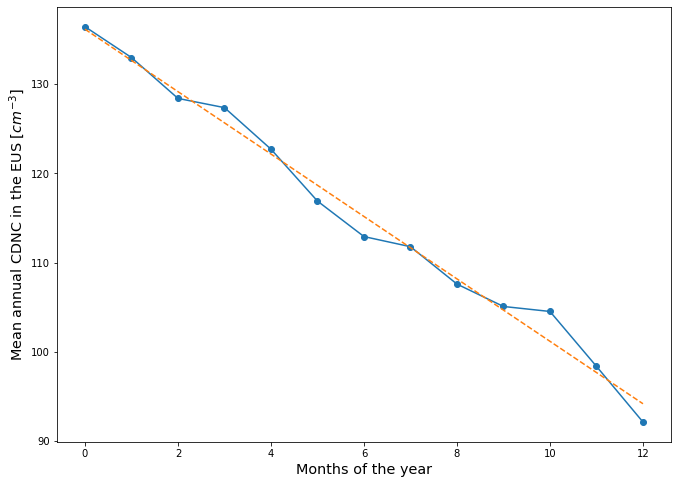

In [29]:
fig,ax=plt.subplots(figsize=(11,8))
months=np.arange(0,13)
m1, c1, r1, p1, se1 = linregress(months, np.mean(yearly, axis=(1)))
print('r-value=', r1)
print('p-value=',p1)
ax.plot(np.mean(yearly, axis=(1)), marker = "o")
ax.plot(months, m1*months+c1, "--")
ax.set_xlabel(r'Months of the year', fontsize='x-large')
ax.set_ylabel(r'Mean annual CDNC in the EUS [$cm^{-3}$]', fontsize='x-large')
plt.show()

r-value= -0.8747594943618789
p-value= 9.088938554420019e-05


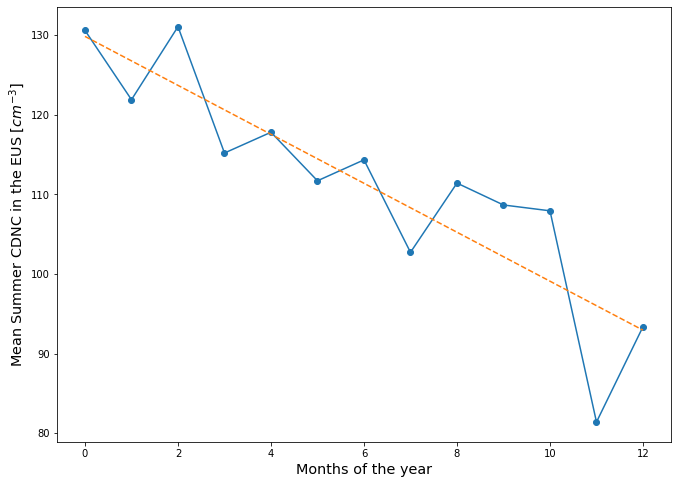

In [30]:
fig,ax=plt.subplots(figsize=(11,8))
months=np.arange(0,13)
m2, c2, r2, p2, se2 = linregress(months, np.mean(summer, axis=(1)))
print('r-value=', r2)
print('p-value=',p2)
ax.plot(np.mean(summer, axis=(1)), marker = "o")
ax.plot(months, m2*months+c2, "--")
ax.set_xlabel(r'Months of the year', fontsize='x-large')
ax.set_ylabel(r'Mean Summer CDNC in the EUS [$cm^{-3}$]', fontsize='x-large')
plt.show()

r-value= -0.9561048047076948
p-value= 3.3399497207987883e-07


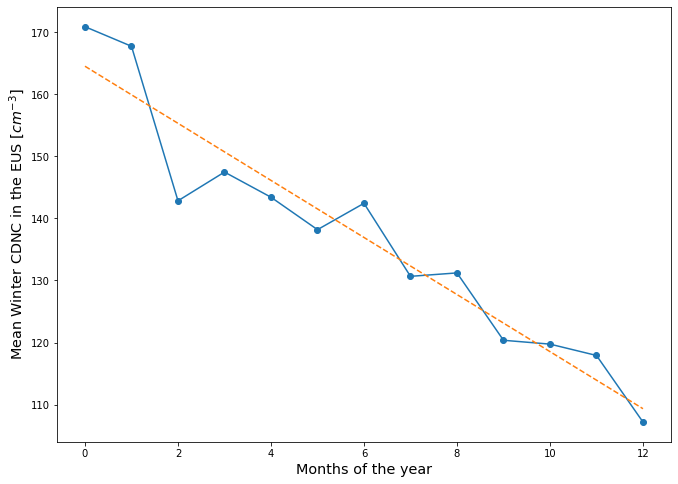

In [31]:
fig,ax=plt.subplots(figsize=(11,8))
months=np.arange(0,13)
m3, c3, r3, p3, se3 = linregress(months, np.mean(winter, axis=(1)))
print('r-value=', r3)
print('p-value=',p3)
ax.plot(np.mean(winter, axis=(1)), marker = "o")
ax.plot(months, m3*months+c3, "--")
ax.set_xlabel(r'Months of the year', fontsize='x-large')
ax.set_ylabel(r'Mean Winter CDNC in the EUS [$cm^{-3}$]', fontsize='x-large')
plt.show()

r-value= -0.9936470234455629
p-value= 8.672961503393991e-12


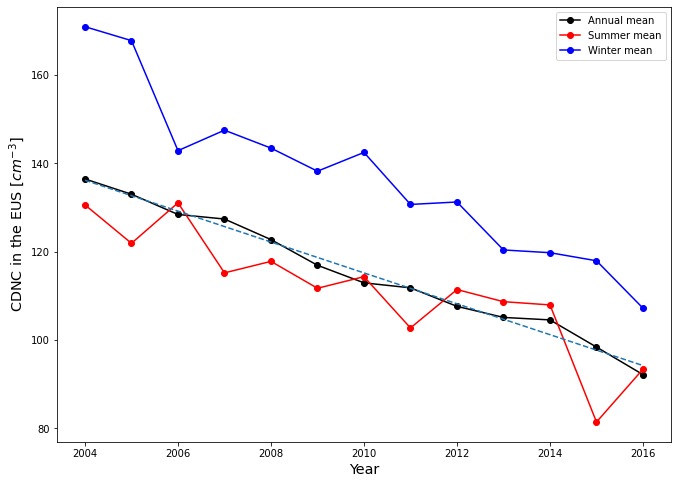

In [36]:
print('r-value=', r1)
print('p-value=',p1)
fig,ax=plt.subplots(figsize=(11,8))
ax.plot(np.mean(yearly, axis=(1)), label = "Annual mean", marker = 'o', c='k')
ax.plot(np.mean(summer, axis=(1)), label = "Summer mean", marker = 'o', c='r')
ax.plot(np.mean(winter, axis=(1)), label = "Winter mean", marker = 'o', c='b')
ax.plot(months, m1*months+c1, "--")
ax.set_xlabel(r'Year', fontsize='x-large')
ax.set_ylabel(r'CDNC in the EUS [$cm^{-3}$]', fontsize='x-large')
ax.set_xticklabels(['2003', '2004', '2006', '2008', '2010', '2012', '2014', '2016', '2017'])
ax.legend(loc='best')
plt.show()